In [14]:
# append parent directory to path, so that we can import modules from histpat_toolkit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
from PIL import Image

from histpat_toolkit.dzi_file import DZIFile
from histpat_toolkit.geom import Rectangle, crop_rect_from_img, paste_rect_into_img
from histpat_toolkit.image_pyramid import DZIPyramid, ImagePyramid

In [2]:
pyramid = ImagePyramid(14, 8000, 6000, 512, "http://0.0.0.0:8000/plant_files/{level}/{x}_{y}.jpeg")
scale = 1 / 2

(600, 500, 3)


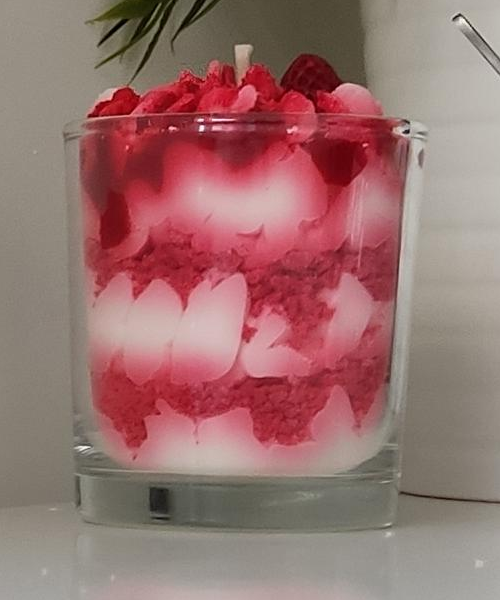

In [3]:
arr = pyramid.crop_rect(Rectangle(4100, 1900, 1000, 1200).scale(scale), scale=scale)
print(arr.shape)

display(Image.fromarray(arr))
# paste_rect_into_img(arr, np.zeros((1000, 750, 3)), Rectangle(0, 0, arr.shape[1], arr.shape[0]))
# display(Image.fromarray(arr))

blue_arr = np.zeros((1000, 750, 3))
blue_arr[:, :] = (0, 0, 255)
blue_arr[:35, :35] = (0, 255, 0)

# paste_rect_into_img(arr, blue_arr, Rectangle(4100, 1900, 1000, 1400).scale(1/8))

# display(Image.fromarray(arr))

In [4]:
# Testing fetching the same rectangle 1000 times for efficiency
# With no caching ~11 seconds
# With caching ~6 seconds
for i in range(1000):
    pyramid.crop_rect(Rectangle(4100, 1900, 1000, 1200).scale(scale), scale=scale)

In [5]:
def show_full(pyramid, scale=1):
    display(Image.fromarray(pyramid.full_image(scale=scale)))


def show_rect(pyramid, rectangle, scale=1, **args):
    display(Image.fromarray(pyramid.crop_rect(rectangle.scale(scale), scale=scale, **args)))

jpg_pyramid.size = (739, 320)


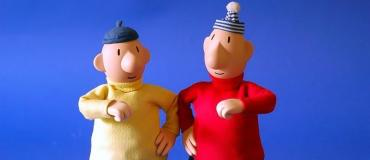

png_pyramid.size = (210, 211)


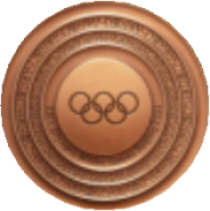

In [6]:
jpg_pyramid = DZIPyramid(DZIFile("http://0.0.0.0:8000/test_jpg.dzi"))
jpg_pyramid = ImagePyramid(
    jpg_pyramid.num_levels,
    jpg_pyramid.size[0],
    jpg_pyramid.size[1],
    jpg_pyramid.tile_size,
    "http://0.0.0.0:8000/test_jpg_files/{level}/{x}_{y}.jpeg",
)

print(f"{jpg_pyramid.size = }")
show_full(jpg_pyramid, scale=0.5)

png_pyramid = DZIPyramid(DZIFile("http://0.0.0.0:8000/test_png.dzi"))
png_pyramid = ImagePyramid(
    png_pyramid.num_levels,
    png_pyramid.size[0],
    png_pyramid.size[1],
    png_pyramid.tile_size,
    "http://0.0.0.0:8000/test_png_files/{level}/{x}_{y}.png",
)

print(f"{png_pyramid.size = }")
show_full(png_pyramid, scale=1)

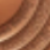

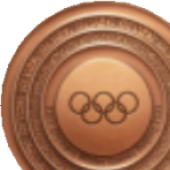

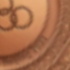

In [7]:
# PNG TEST IN BOUNDS
scale = 1
show_rect(png_pyramid, Rectangle(125, 125, 50, 50).scale(scale), scale=scale)
show_rect(png_pyramid, Rectangle(0, 0, 170, 170, 0).scale(scale), scale=scale)
show_rect(png_pyramid, Rectangle(100, 100, 70, 70, 0.6).scale(scale), scale=scale)
# show_rect(png_pyramid, Rectangle(500, 500, 80, 160))

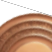

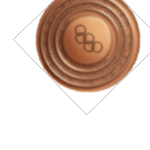

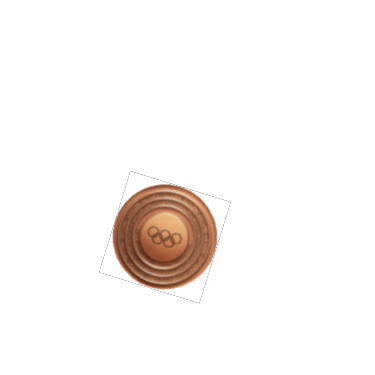

In [8]:
# PNG OUT OF BOUNDS TEST
scale = 0.5
show_rect(png_pyramid, Rectangle(0, 0, *png_pyramid.size, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(png_pyramid, Rectangle(-150, 350, 600, 600, 0.8).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(png_pyramid, Rectangle(-700, -500, 1500, 1500, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)

my_inf = 1e5 + 0.5
show_rect(png_pyramid, Rectangle(my_inf, my_inf, 1, 1, 1.23), allow_out_of_bounds=True)

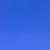

In [9]:
# JPG TEST IN BOUNDS
scale = 0.5
show_rect(jpg_pyramid, Rectangle(0, 0, 200, 200).scale(scale), scale=scale)

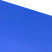

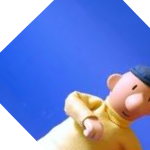

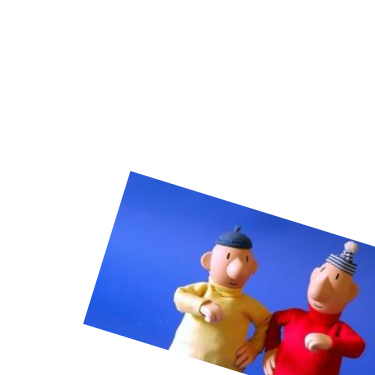

In [10]:
# JPG OUT OF BOUNDS TEST
scale = 0.5
show_rect(jpg_pyramid, Rectangle(0, 0, *png_pyramid.size, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(jpg_pyramid, Rectangle(-150, 350, 600, 600, 0.8).scale(scale), scale=scale, allow_out_of_bounds=True)
show_rect(jpg_pyramid, Rectangle(-700, -500, 1500, 1500, 0.3).scale(scale), scale=scale, allow_out_of_bounds=True)

my_inf = 1e5 + 0.5
show_rect(jpg_pyramid, Rectangle(my_inf, my_inf, 1, 1, 1.23), allow_out_of_bounds=True)

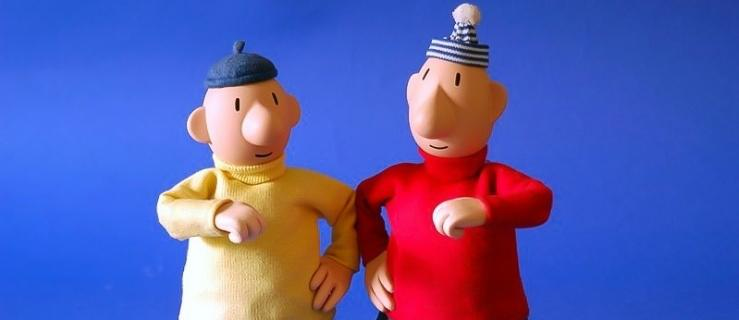

(320, 739, 3)


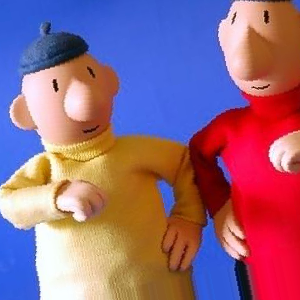

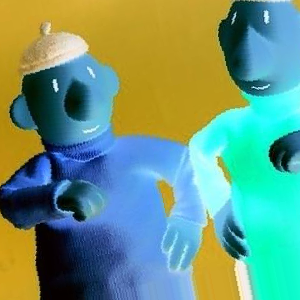

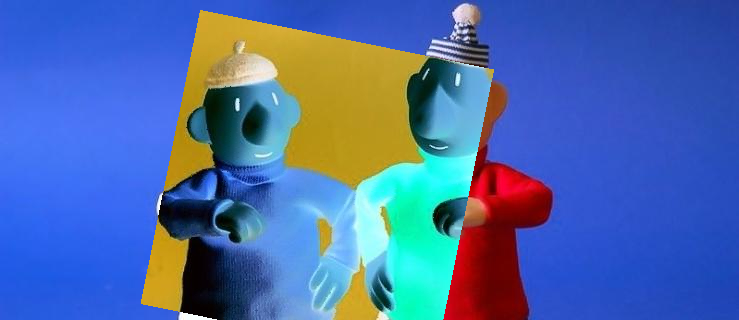

In [11]:
arr = jpg_pyramid.full_image(scale=1)
display(Image.fromarray(arr))
print(arr.shape)

rect = Rectangle(200, 10, 300, 300, -0.2)
cropped = crop_rect_from_img(arr, rect=rect)
display(Image.fromarray(cropped))

cropped[::, ::] = 255 - cropped[::, ::]

display(Image.fromarray(cropped))

modified_arr = paste_rect_into_img(arr.copy(), cropped, rect)

display(Image.fromarray(modified_arr))